### Introdução:

A análise de dados no setor bancário desempenha um papel crucial na compreensão dos padrões de comportamento financeiro dos clientes e na avaliação de riscos associados. 

Neste projeto, explorei um conjunto de dados bancários que inclui uma variedade de variáveis, desde informações demográficas até históricos de crédito. O objetivo é fornecer insights valiosos que possam auxiliar as instituições financeiras na tomada de decisões informadas.


In [59]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Carregar dados
df = pd.read_csv('treino.csv')
display(df.head())


,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Análise Geral

Inicío a análise exploratória identificando características gerais do conjunto de dados, como estatísticas descritivas e distribuições de variáveis-chave. 

Observando questões cruciais, como a presença de valores ausentes e sua imputação para garantir a robustez das conclusões. 

A partir daí, mergulho em análises mais específicas, explorando correlações entre variáveis numéricas, investigando a relação entre inadimplência e fatores como idade, número de dependentes, razão de débito e salário mensal.


In [61]:
# Verificar informações sobre as colunas e tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [62]:
# Estatísticas descritivas do conjunto de dados
print(df.describe())

        inadimplente  util_linhas_inseguras          idade  \
count  110000.000000          110000.000000  110000.000000   
mean        0.066645               5.929979      52.255636   
std         0.249408             252.301965      14.768241   
min         0.000000               0.000000       0.000000   
25%         0.000000               0.030054      41.000000   
50%         0.000000               0.155936      52.000000   
75%         0.000000               0.562806      63.000000   
max         1.000000           50708.000000     109.000000   

       vezes_passou_de_30_59_dias   razao_debito  salario_mensal  \
count               110000.000000  110000.000000    8.823700e+04   
mean                     0.424055     354.823589    6.637411e+03   
std                      4.240780    2074.140421    1.338395e+04   
min                      0.000000       0.000000    0.000000e+00   
25%                      0.000000       0.175016    3.400000e+03   
50%                      0.000000

### Tratamento dos dados

In [63]:
# Tratar valores nulos
df['salario_mensal'].fillna(df['salario_mensal'].median(), inplace=True)
df['numero_de_dependentes'].fillna(df['numero_de_dependentes'].median(), inplace=True)


In [64]:
# Verificar novamente valores nulos
print("Valores Nulos:")
print(df.isnull().sum())

Valores Nulos:
inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64


### Visualização gráfica dos dados

A visualização gráfica desempenhou um papel essencial na abordagem, permitindo comunicar efetivamente padrões complexos e tendências emergentes. 

Utilizei uma variedade de gráficos, desde histogramas e boxplots até gráficos de densidade e barras empilhadas, para capturar a riqueza de informações contidas nos dados bancários.


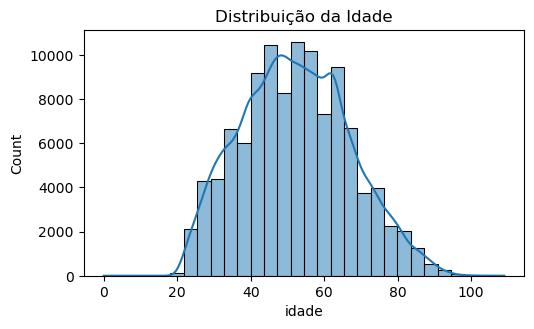

In [91]:
# Visualização da distribuição das variáveis
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['idade'], bins=30, kde=True)
plt.title('Distribuição da Idade')

plt.tight_layout()
plt.show()

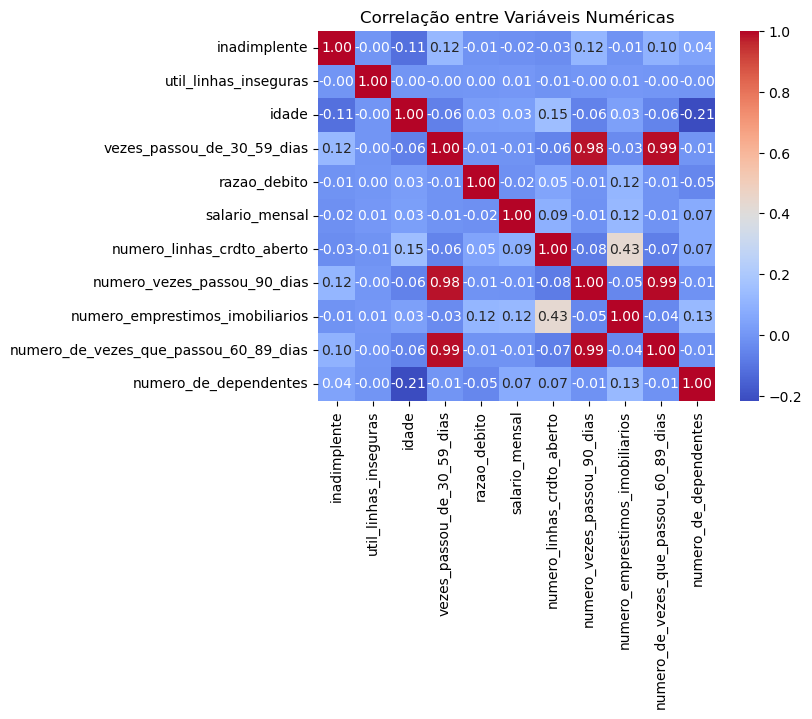

In [68]:
# Correlação entre variáveis numéricas
correlacao = df.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

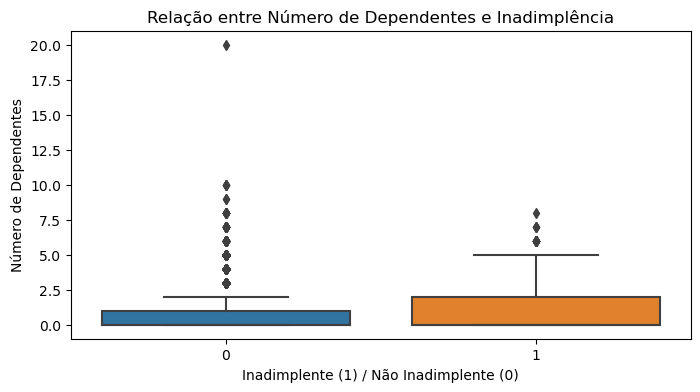

In [90]:
# Análise da relação entre o número de dependentes e inadimplência
plt.figure(figsize=(8, 4))
sns.boxplot(x='inadimplente', y='numero_de_dependentes', data=df)
plt.title('Relação entre Número de Dependentes e Inadimplência')
plt.xlabel('Inadimplente (1) / Não Inadimplente (0)')
plt.ylabel('Número de Dependentes')
plt.show()

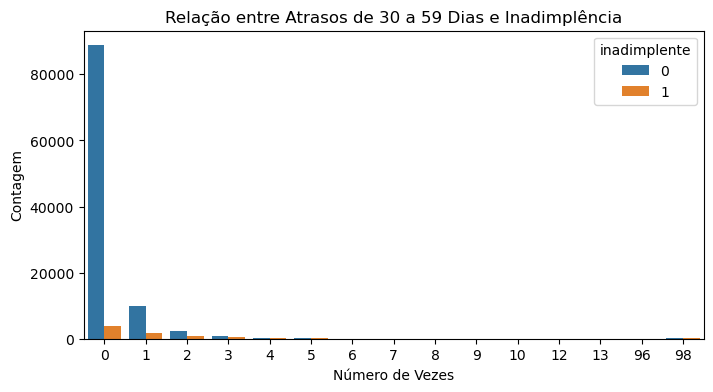

In [92]:
# Análise do número de vezes que passou de 30 a 59 dias em atraso
plt.figure(figsize=(8, 4))
sns.countplot(x='vezes_passou_de_30_59_dias', hue='inadimplente', data=df)
plt.title('Relação entre Atrasos de 30 a 59 Dias e Inadimplência')
plt.xlabel('Número de Vezes')
plt.ylabel('Contagem')
plt.show()

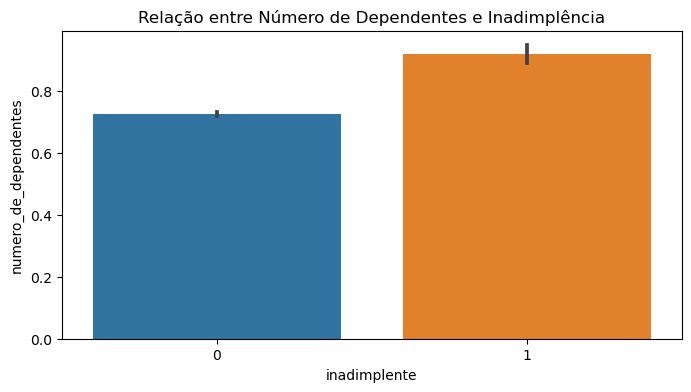

In [93]:
# Análise da relação entre o número de dependentes e inadimplência usando gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x='inadimplente', y='numero_de_dependentes', data=df)
plt.title('Relação entre Número de Dependentes e Inadimplência')
plt.show()

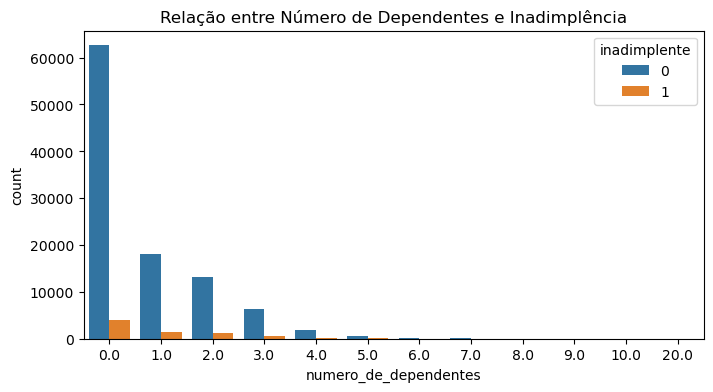

In [94]:
# Análise da relação entre ter filhos e inadimplência
plt.figure(figsize=(8, 4))
sns.countplot(x='numero_de_dependentes', hue='inadimplente', data=df)
plt.title('Relação entre Número de Dependentes e Inadimplência')
plt.show()

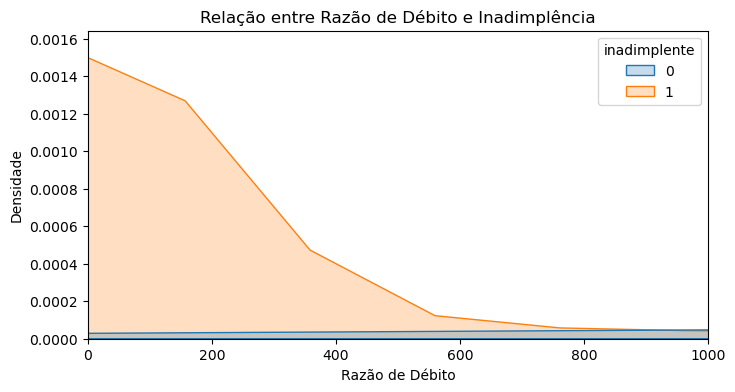

In [95]:
# Análise da relação entre razão de débito e inadimplência usando gráfico de densidade
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='razao_debito', hue='inadimplente', common_norm=False, fill=True)
plt.title('Relação entre Razão de Débito e Inadimplência')
plt.xlabel('Razão de Débito')
plt.ylabel('Densidade')
plt.xlim(0, 1000)  # Ajuste os valores conforme necessário
plt.show()

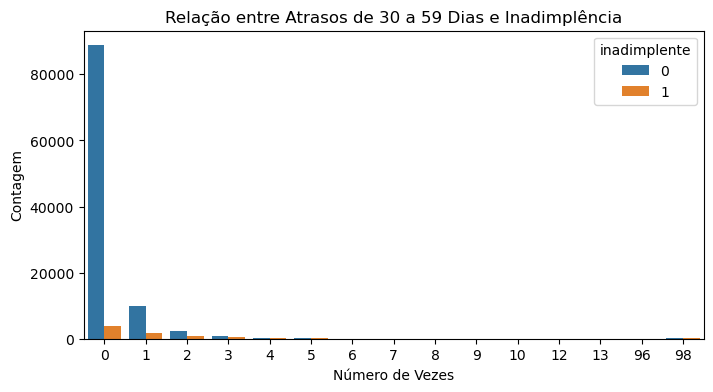

In [96]:
# Análise da relação entre o número de vezes que passou de 30 a 59 dias em atraso
plt.figure(figsize=(8, 4))
sns.countplot(x='vezes_passou_de_30_59_dias', hue='inadimplente', data=df)
plt.title('Relação entre Atrasos de 30 a 59 Dias e Inadimplência')
plt.xlabel('Número de Vezes')
plt.ylabel('Contagem')
plt.show()


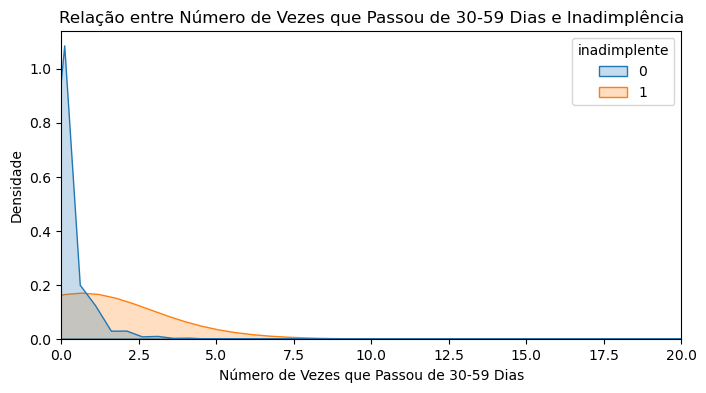

In [97]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='vezes_passou_de_30_59_dias', hue='inadimplente', common_norm=False, fill=True)
plt.title('Relação entre Número de Vezes que Passou de 30-59 Dias e Inadimplência')
plt.xlabel('Número de Vezes que Passou de 30-59 Dias')
plt.ylabel('Densidade')

# Definindo a faixa do eixo X
plt.xlim(0, 20)  # Ajuste os valores conforme necessário
plt.show()

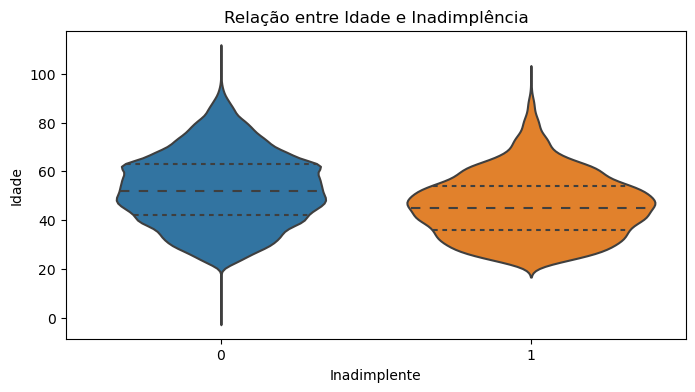

In [101]:
# A. Existe alguma relação entre ter idade e pagar um empréstimo em dia?
plt.figure(figsize=(8, 4))
sns.violinplot(x='inadimplente', y='idade', data=df, inner="quartile")
plt.title('Relação entre Idade e Inadimplência')
plt.xlabel('Inadimplente')
plt.ylabel('Idade')
plt.show()

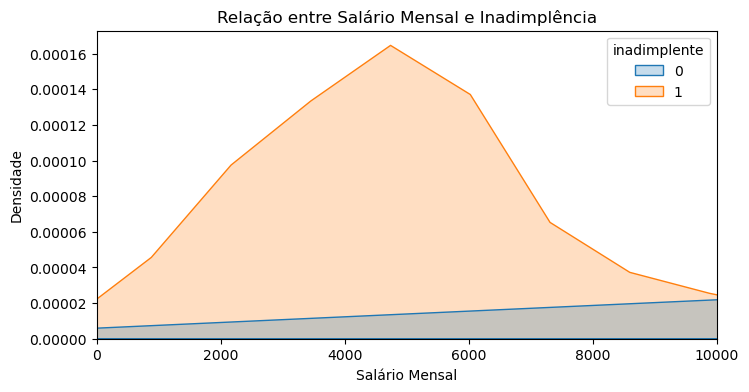

In [103]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='salario_mensal', hue='inadimplente', common_norm=False, fill=True)
plt.title('Relação entre Salário Mensal e Inadimplência')
plt.xlabel('Salário Mensal')
plt.ylabel('Densidade')

# Definindo a faixa do eixo X
plt.xlim(0, 10000)  # Ajuste os valores conforme necessário

plt.show()

In [77]:
# Criar percentual de inadimplência para cada idade
percent_inadimplente_por_idade = df.groupby('idade')['inadimplente'].mean() * 100
quantidade_por_idade = df['idade'].value_counts()

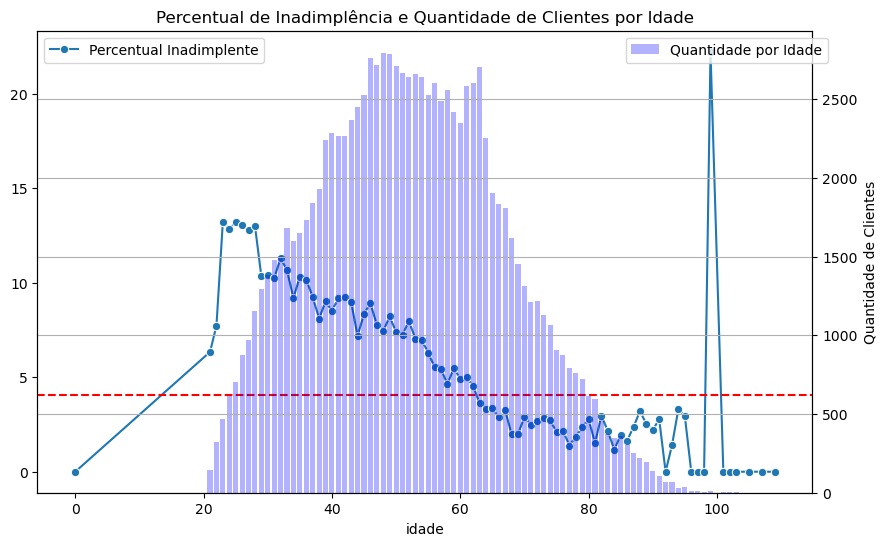

In [104]:
# Criar um gráfico de linha com barras
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
sns.lineplot(x=percent_inadimplente_por_idade.index, y=percent_inadimplente_por_idade.values, marker='o', ax=ax1, label='Percentual Inadimplente')
plt.axhline(y=percent_inadimplente_por_idade.median(), color='r', linestyle='--', label='Mediana')

ax2 = ax1.twinx()
ax2.bar(quantidade_por_idade.index, quantidade_por_idade.values, alpha=0.3, color='b', label='Quantidade por Idade')

plt.title('Percentual de Inadimplência e Quantidade de Clientes por Idade')
plt.xlabel('Idade')
plt.ylabel('Percentual de Inadimplência')
ax2.set_ylabel('Quantidade de Clientes')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))
plt.grid(True)
plt.show()

In [80]:
# Criar uma nova coluna 'Faixa Etária'
bins = [18, 30, 60, 120]  
labels = ['Jovem', 'Adulto', 'Idoso']
df['Faixa Etária'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

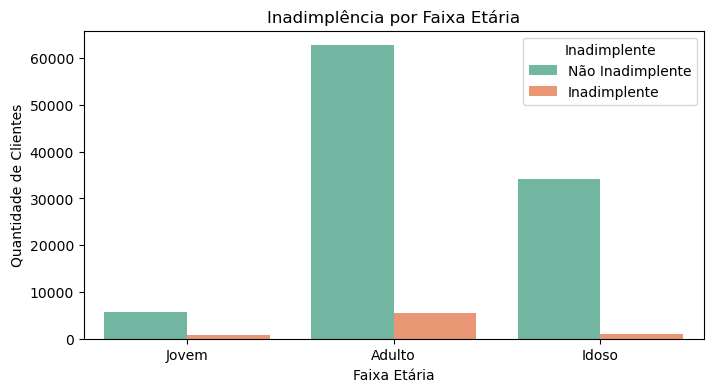

In [110]:
# Criar um gráfico de barras empilhadas para avaliar inadimplência por faixa etária
plt.figure(figsize=(8, 4))
sns.countplot(x='Faixa Etária', hue='inadimplente', data=df, palette='Set2')
plt.title('Inadimplência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Inadimplente', labels=['Não Inadimplente', 'Inadimplente'])
plt.show()

In [81]:
# Calcular a média de inadimplência por número de dependentes
media_por_dependentes = df.groupby('numero_de_dependentes')['inadimplente'].mean().reset_index()

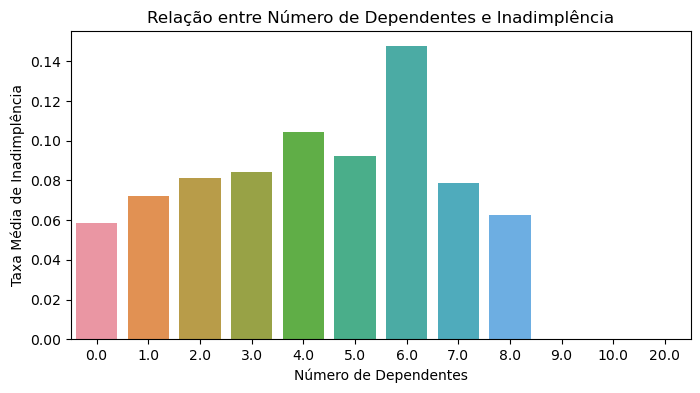

In [105]:
# Criar um gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x='numero_de_dependentes', y='inadimplente', data=media_por_dependentes)
plt.title('Relação entre Número de Dependentes e Inadimplência')
plt.xlabel('Número de Dependentes')
plt.ylabel('Taxa Média de Inadimplência')
plt.show()

In [83]:
# Criar uma nova coluna 'Categoria de Razão de Débito'
categorias = ['Baixa', 'Média', 'Alta']
df['Categoria de Razão de Débito'] = pd.qcut(df['razao_debito'], q=[0, 0.25, 0.75, 1], labels=categorias)

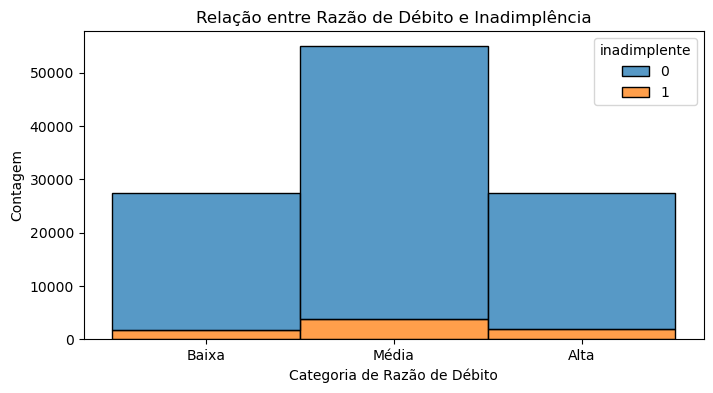

In [106]:
# Criar um gráfico de barras empilhadas
plt.figure(figsize=(8, 4))
sns.histplot(x='Categoria de Razão de Débito', hue='inadimplente', bins=30, data=df, multiple="stack")
plt.title('Relação entre Razão de Débito e Inadimplência')
plt.xlabel('Categoria de Razão de Débito')
plt.ylabel('Contagem')
plt.show()

In [85]:
# Criar uma nova coluna 'Faixa Salarial'
faixas_salariais = ['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta']
df['Faixa Salarial'] = pd.qcut(df['salario_mensal'], q=[0, 0.25, 0.5, 0.75, 1], labels=faixas_salariais)

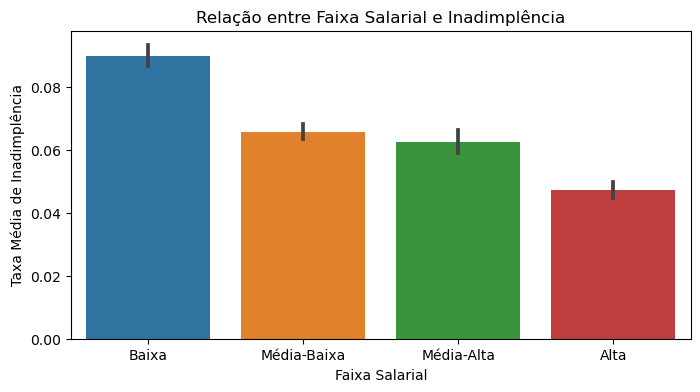

In [107]:
# Criar um gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x='Faixa Salarial', y='inadimplente', data=df)
plt.title('Relação entre Faixa Salarial e Inadimplência')
plt.xlabel('Faixa Salarial')
plt.ylabel('Taxa Média de Inadimplência')
plt.show()

## Insights

### Faixa Etária (Idade):

há diferenças significativas entre subgrupos dentro da faixa etária, tornando a faixa de 30 a 60 anos uma faixa mais sensível.

Considero, posteriormente  criar uma segmentação mais granular para investigar padrões específicos em determinadas faixas etárias.

### Número de Dependentes e Faixa Salarial:

A presença de dependentes afeta a pontualidade do pagamento de maneira diferente para clientes com renda mais alta ou mais baixa. clientes com mais dependentes e com maior renda tem mais chances de serem pontais com os pagamentos.

### Razão de Débito:


Além da análise geral, investiguei a razão de débito e notei que tem um impacto mais negativo na inadimplência quando o valor é menor.

### Conclusão:

Em conclusão, a análise proporcionou uma visão abrangente dos fatores que podem influenciar a inadimplência em um contexto bancário. 

Observamos que a idade, o número de dependentes, a razão de débito e o salário mensal têm impactos significativos nas tendências de inadimplência. 

Além disso, identificamos faixas etárias específicas e categorias salariais que merecem atenção especial devido a um maior risco percebido.

As ferramentas estatísticas e visuais empregadas nesta análise proporcionaram uma compreensão mais profunda dos padrões subjacentes nos dados. 

Recomendações estratégicas podem ser formuladas com base nessas descobertas, auxiliando instituições financeiras na otimização de suas políticas de concessão de crédito e na gestão de riscos.

Esse projeto não apenas demonstra habilidades analíticas, mas também destaca a importância da interpretação de dados no contexto bancário, onde a precisão na avaliação de riscos é crucial para o sucesso a longo prazo.